=== Shapiro-Wilk Test ===
Before treatment: statistic=0.7953, p=0.0001
After treatment:  statistic=0.9122, p=0.0169
Data is NOT normally distributed -> Wilcoxon Signed-Rank Test

=== Wilcoxon Signed-Rank Test ===
Test statistic W=0.000000000, p=0.000000002
Reject H0 at alpha=0.05. The treatment had a statistically significant effect.


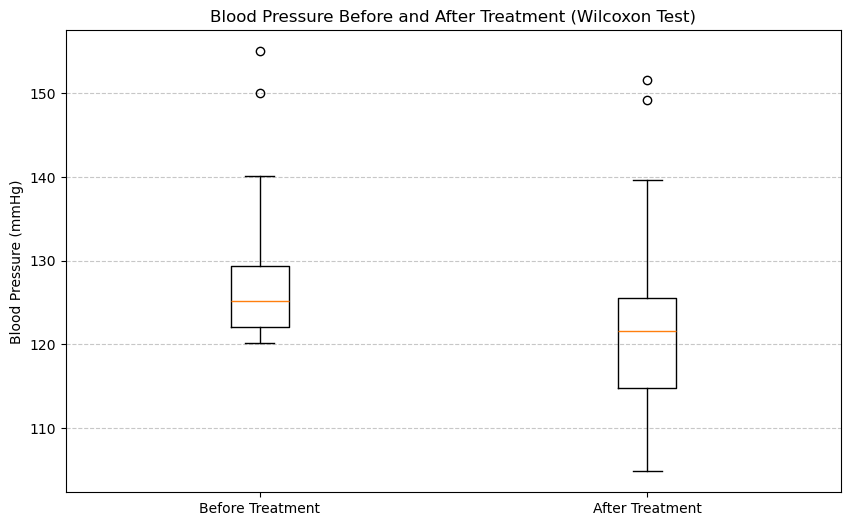

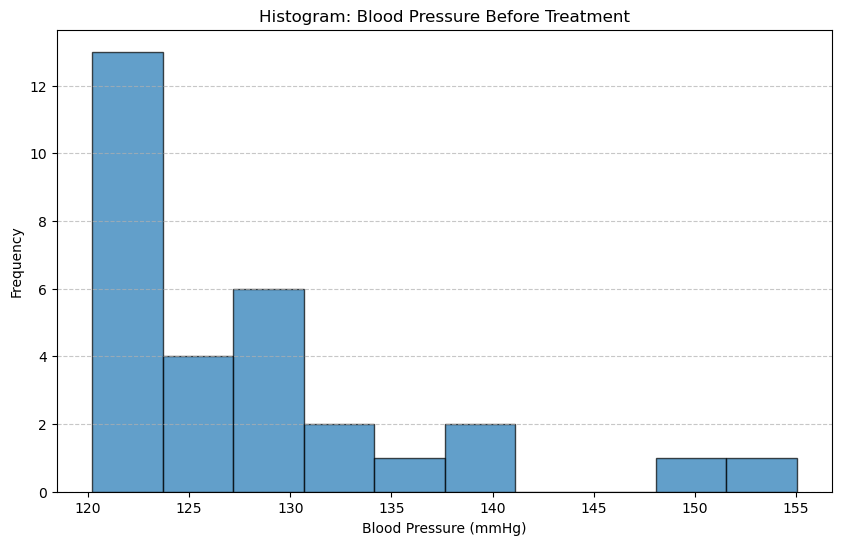

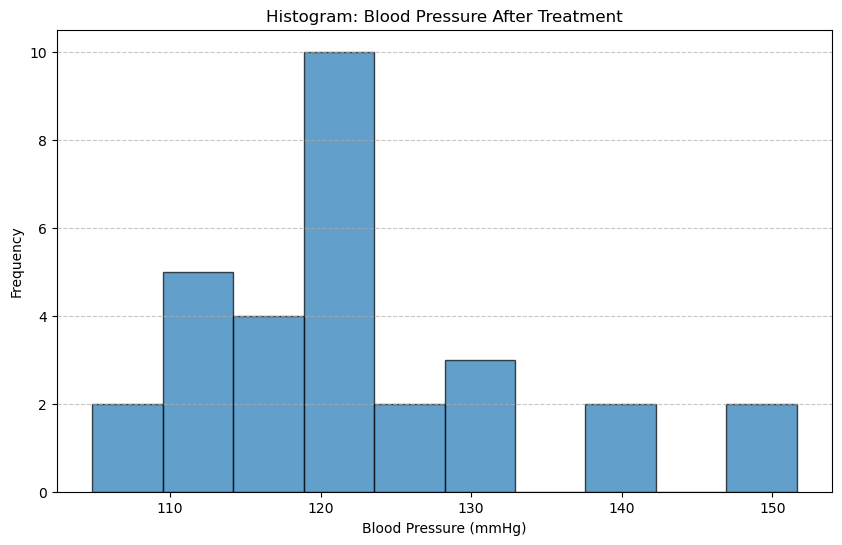

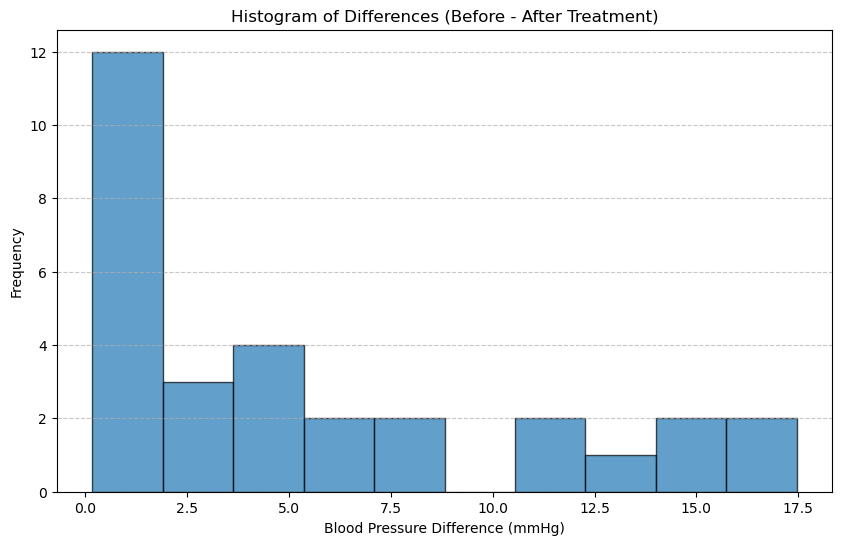

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, wilcoxon

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data
n = 30
bp_before = np.random.exponential(scale=10, size=n) + 120  # Blood pressure before treatment
bp_after = bp_before - np.random.exponential(scale=5, size=n)  # Blood pressure after treatment

# 2. Shapiro-Wilk test for normality
shapiro_before = shapiro(bp_before)
shapiro_after = shapiro(bp_after)

print("=== Shapiro-Wilk Test ===")
print(f"Before treatment: statistic={shapiro_before.statistic:.4f}, p={shapiro_before.pvalue:.4f}")
print(f"After treatment:  statistic={shapiro_after.statistic:.4f}, p={shapiro_after.pvalue:.4f}")

if shapiro_before.pvalue < 0.05 or shapiro_after.pvalue < 0.05:
    print("Data is NOT normally distributed -> Wilcoxon Signed-Rank Test")
else:
    print("Data is normally distributed -> Paired t-test can be used")

# 3. Wilcoxon Signed-Rank Test
wilcoxon_test = wilcoxon(bp_before, bp_after, alternative='two-sided')
p_value = wilcoxon_test.pvalue

print("\n=== Wilcoxon Signed-Rank Test ===")
print(f"Test statistic W={wilcoxon_test.statistic:.9f}, p={p_value:.9f}")

alpha = 0.05
if p_value < alpha:
    print(f"Reject H0 at alpha={alpha}. The treatment had a statistically significant effect.")
else:
    print(f"Fail to reject H0 at alpha={alpha}. No statistically significant effect found.")

# 4. Boxplot with p-value annotation
plt.figure(figsize=(10, 6))
plt.boxplot([bp_before, bp_after], labels=['Before Treatment', 'After Treatment'])
plt.title("Blood Pressure Before and After Treatment (Wilcoxon Test)")
plt.ylabel("Blood Pressure (mmHg)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Histogram of blood pressure before treatment
plt.figure(figsize=(10, 6))
plt.hist(bp_before, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram: Blood Pressure Before Treatment")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Histogram of blood pressure after treatment
plt.figure(figsize=(10, 6))
plt.hist(bp_after, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram: Blood Pressure After Treatment")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Histogram of differences (Before - After)
differences = bp_before - bp_after
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of Differences (Before - After Treatment)")
plt.xlabel("Blood Pressure Difference (mmHg)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
